In [162]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
train = pd.read_csv('/content/drive/MyDrive/CSE427/CSE427 Lab/Lab 1/train.csv')
test = pd.read_csv('/content/drive/MyDrive/CSE427/CSE427 Lab/Lab 1/test.csv')
check = pd.read_csv('/content/drive/MyDrive/CSE427/CSE427 Lab/Lab 1/gender_submission.csv')
%pwd
#https://neptune.ai/blog/google-colab-dealing-with-files
train.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [164]:
check.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [165]:
print(train.shape)

(891, 12)


<Axes: >

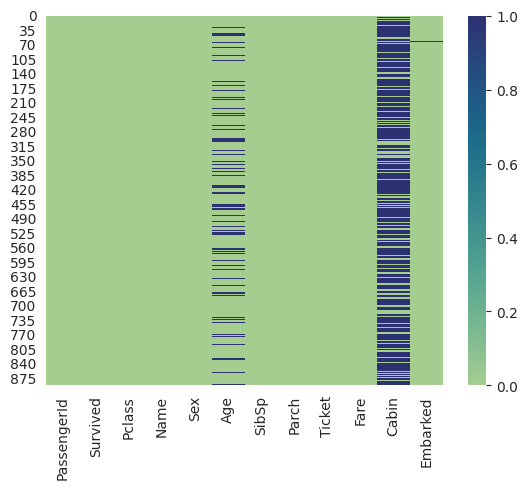

In [166]:
sbn.heatmap(train.isnull(), cmap = 'crest')
# additional arguments ( xticklabels = False, yticklabels = False, cbar = False)

<Axes: xlabel='Survived', ylabel='count'>

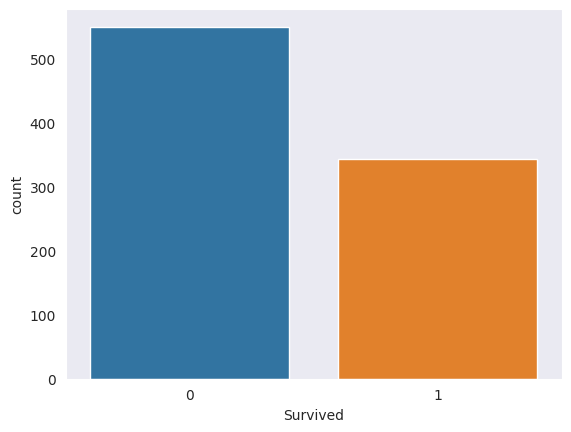

In [167]:
sbn.set_style('dark')
sbn.countplot(x = 'Survived', data = train)

<Axes: xlabel='Survived', ylabel='count'>

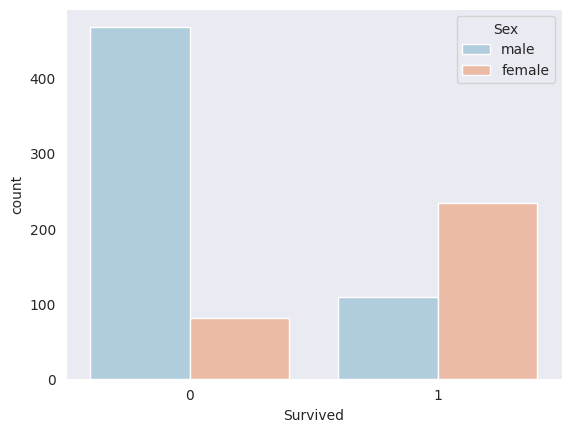

In [168]:
sbn.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'RdBu_r')

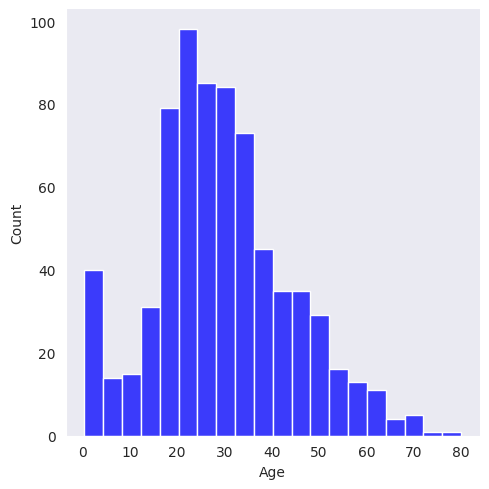

In [169]:
sbn.displot(train['Age'].dropna(),kind = 'hist', color = 'blue', bins = 20)

<Axes: >

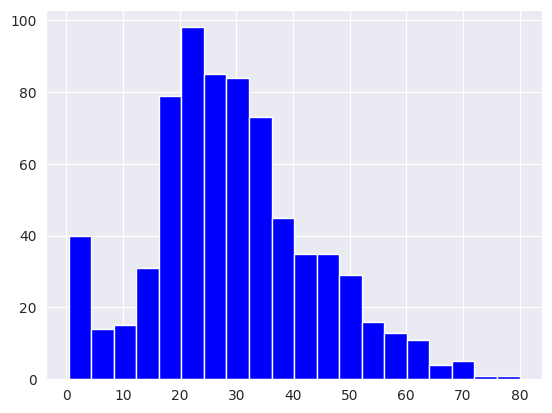

In [170]:
train['Age'].hist(bins = 20, color = 'blue', alpha = 1)

<Axes: xlabel='Pclass', ylabel='Age'>

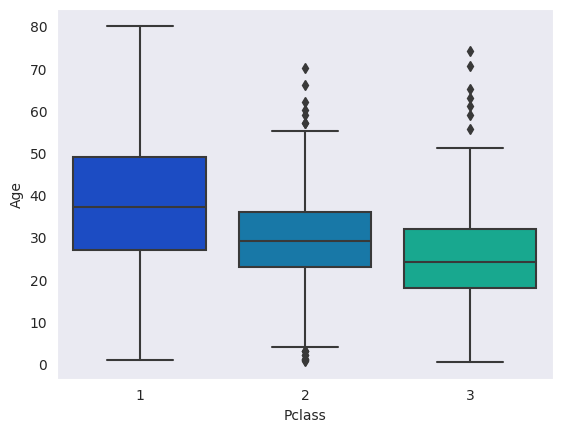

In [171]:
sbn.boxplot(data = train, x = 'Pclass', y = 'Age', palette = 'winter')

In [172]:
#learn how to edit columns of a dataframe http://pytolearn.csd.auth.gr/b4-pandas/40/moddfcols.html
row, col = train.shape
for r in range(row):
  if train['Pclass'][r] == 1:
    train['Age'][r] = 38
  elif train['Pclass'][r] == 2:
    train['Age'][r] = 30
  else:
    train['Age'][r] = 25
train.head()

<ipython-input-172-378de8794649>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][r] = 25
<ipython-input-172-378de8794649>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][r] = 38
<ipython-input-172-378de8794649>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][r] = 30


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,25.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,25.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,38.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,25.0,0,0,373450,8.0500,NaN,S


In [173]:

row, col = test.shape
for r in range(row):
  if test['Pclass'][r] == 1:
    test['Age'][r] = 38
  elif test['Pclass'][r] == 2:
    test['Age'][r] = 30
  else:
    test['Age'][r] = 25

test.head()

<ipython-input-173-02eeeca521a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][r] = 25
<ipython-input-173-02eeeca521a0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][r] = 30
<ipython-input-173-02eeeca521a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][r] = 38


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,25.0,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,25.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,30.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,25.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,25.0,1,1,3101298,12.2875,NaN,S


<Axes: >

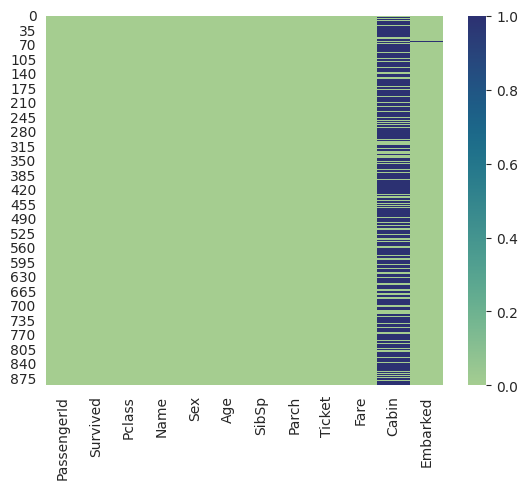

In [174]:
sbn.heatmap(train.isnull(), cmap = 'crest')

In [175]:
train.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,25.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,25.0,0,0,7.9250,S
3,1,1,female,38.0,1,0,53.1000,S
4,0,3,male,25.0,0,0,8.0500,S


In [176]:
test.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,25.0,0,0,7.8292,Q
1,3,female,25.0,1,0,7.0000,S
2,2,male,30.0,0,0,9.6875,Q
3,3,male,25.0,0,0,8.6625,S
4,3,female,25.0,1,1,12.2875,S


In [177]:
embarked = pd.get_dummies(train['Embarked'])
sex = pd.get_dummies(train['Sex'])
train.drop(['Embarked', 'Sex'], axis = 1, inplace = True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,25.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,25.0,0,0,7.9250
3,1,1,38.0,1,0,53.1000
4,0,3,25.0,0,0,8.0500


In [178]:
embarked2 = pd.get_dummies(test['Embarked'])
sex2 = pd.get_dummies(test['Sex'])
test.drop(['Embarked', 'Sex'], axis = 1, inplace = True)
test.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,25.0,0,0,7.8292
1,3,25.0,1,0,7.0000
2,2,30.0,0,0,9.6875
3,3,25.0,0,0,8.6625
4,3,25.0,1,1,12.2875


In [179]:
train = pd.concat([train, sex, embarked], axis = 1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,25.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,25.0,0,0,7.9250,1,0,0,0,1
3,1,1,38.0,1,0,53.1000,1,0,0,0,1
4,0,3,25.0,0,0,8.0500,0,1,0,0,1


In [180]:
test = pd.concat([test, sex2, embarked2], axis = 1)
test.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,25.0,0,0,7.8292,0,1,0,1,0
1,3,25.0,1,0,7.0000,1,0,0,0,1
2,2,30.0,0,0,9.6875,0,1,0,1,0
3,3,25.0,0,0,8.6625,0,1,0,0,1
4,3,25.0,1,1,12.2875,1,0,0,0,1


In [181]:
#For training data :
Y = train['Survived'].to_numpy()
print(f'Y:\n{Y}')
print('=====================================')
train.drop(['Survived'],axis=1,inplace=True)
X = train.to_numpy()
row,col = X.shape
X = np.c_[X,np.ones(row)]
print(f'X:\n{X}')
print('=====================================')
a = np.transpose(X)
b = np.linalg.inv(np.matmul(a,X))
c = np.matmul(b,a)
w = np.matmul(c,Y)
print(f'w:\n{w}')
print('=====================================')

#For testing data :
X_test = test.to_numpy()
row,col = X_test.shape
X_test = np.c_[X_test,np.ones(row)]
Y_test = np.matmul(X_test,w)
print(f'Y_test:\n{Y_test}')
print('============================================')

for i in range(0,len(Y_test)) :
    if Y_test[i] < 0 :
        Y_test[i] = 0
    else :
        Y_test[i] = 1

print(f'Y_test after updating for survival and dead:\n{Y_test}')
print('============================================')

#For gender information :
Y_check = check['Survived'].to_numpy()
print(f'Y_check:\n{Y_check}')
print('=============================================')

a = 0
for i in range(0,len(Y_test)) :
    if Y_test[i] == Y_check[i] :
        a += 1
accuracy = a/row
print(f'Accuracy: {accuracy}')
# print(f'Error: {1-accuracy}')

# e = 0
# for j in range(0,len(Y_test)) :
#     e += (Y_test[j] - Y_check[j])**2
# error = e/len(Y_test)
# accuracy = 1 - error
# print(f'Accuracy: {accuracy}')

Y:
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0